# Análisis descriptivo

Voy a conisderar cada par de conformaciones disimilares de un mismo compuesto, calcular el Delta de número de las interacciones.

De todos esos casos voy a sacar distribuciones de valores de Delta para cada tipo de interacción.

Quiero representar, por cada clase química, las distribuciones de Deltas para ver si existen patrones significativos según la case química.

In [ ]:
!pip install requests
!pip install pandarallel
!pip install rdkit

  Preparing metadata (setup.py) ... done
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16674 sha256=f194a239d246ed4f3359a4201bd1b11ba9a4e37d872e5d0c4325f83c2d8d906f
  Stored in directory: /root/.cache/pip/wheels/b9/c6/5a/829298789e94348b81af52ab42c19d49da007306bbcc983827
Successfully built pandarallel
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 45.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Abrir el dataframe

import pandas as pd

df_2 = pd.read_csv("/content/drive/MyDrive/TFM/T3/Archivos/df_FINAL_tot.csv", sep=',')
df_2.shape[0]

70378

In [ ]:
#@title Ligandos únicos en el dataframe final

ligandos_unicos = list(set(df_2['Ligand_id'].tolist()))
print(f"Ligandos únicos: {len(ligandos_unicos)}")

Ligandos únicos: 2871


In [ ]:
#@title Comprobar las familias uniprot que faltan

no_uniprot_fam = df_2['intepro_class'].isna().sum()
df_2_sin_dupli = df_2.drop_duplicates(subset="Uniprot_id").reset_index(drop=True)
no_uniprot_fam_uni = df_2_sin_dupli['intepro_class'].isna().sum()
print(f"En el df {no_uniprot_fam_uni} proteínas uniprot no tienen clasificación, que corresponden a {no_uniprot_fam} instancias en el dataframe")

En el df 63 proteínas uniprot no tienen clasificación, que corresponden a 340 instancias en el dataframe


In [ ]:
#@title Total clases químicas de los lignados

print(len(list(set(df_2['Ligand_Class']))))

27


In [ ]:
df_2['Ligand_Class'].isna().sum()
#@title Comprobar las familias uniprot que faltan

no_quimica_fam = df_2['Ligand_Class'].isna().sum()
df_2_sin_dupli_quimi = df_2.drop_duplicates(subset="Ligand_Class").reset_index(drop=True)
no_quimi_fam_uni = df_2_sin_dupli['Ligand_Class'].isna().sum()
print(f"En el df {no_quimi_fam_uni} ligandos no tienen clasificación, que corresponden a {no_quimica_fam} instancias en el dataframe")

En el df 139 ligandos no tienen clasificación, que corresponden a 1221 instancias en el dataframe


El dataframe final tiene 70 378 instancias y 2 871 ligando únicos.
Tenemos algunas celdas vacías.

In [ ]:
df_2['Ligand_Class'].value_counts()

,count
Ligand_Class,
"Nucleosides, nucleotides, and analogues",17378
Organoheterocyclic compounds,11086
Organic oxygen compounds,10186
Organic acids and derivatives,6764
Fatty Acyls,5672
Benzenoids,4978
Organic nitrogen compounds,2984
Steroids and steroid derivatives,2718
Prenol lipids,1761


Quiero unir "Alkyl-CoA disulfides", "S-alkyl-CoAs" y "Nucleosides, nucleotides, and analogues" en una única clase.

Fatty acyls + glycerolipids + glycerophospholipids + sphingolipids + saccharolipids = fatty lipids.

In [ ]:
#@title Unir clases

map_class = {
    "Alkyl-CoA disulfides":"Nucleosides, nucleotides, and analogues",
             "S-alkyl-CoAs":"Nucleosides, nucleotides, and analogues",
    "Fatty Acyls":"Fatty Lipids",
    "Glycerolipids":"Fatty Lipids",
    "Glycerophospholipids":"Fatty Lipids",
    "Sphingolipids":"Fatty Lipids",
    "Saccharolipids":"Fatty Lipids",
    "Hydrocarbon derivatives":"Hydrocarbons and derivates",
    "Hydrocarbons":"Hydrocarbons and derivates",
    "Organic salts":"Other",
    "Lignans, neolignans and related compounds":"Other",
    "Organometallic compounds":"Other",
    "Organophosphorus compounds":"Other",
    "Organic 1,3-dipolar compounds":"Other",
             }

df_2['Ligand_Class'] = df_2['Ligand_Class'].replace(map_class)

In [ ]:
df_2['Ligand_Class'].value_counts()

,count
Ligand_Class,
"Nucleosides, nucleotides, and analogues",17413
Organoheterocyclic compounds,11086
Organic oxygen compounds,10186
Fatty Lipids,8316
Organic acids and derivatives,6764
Benzenoids,4978
Organic nitrogen compounds,2984
Steroids and steroid derivatives,2718
Prenol lipids,1761


In [ ]:
#@title Abrir dataframe con interacciones de BINANA

df_binana = pd.read_csv("/content/drive/MyDrive/TFM/T3/Analisis_descriptivo/df_total_binana_instancias_norm.csv", sep = ',')
df_binana.shape[0]

70378

In [ ]:
#@title Comprobar que no hay duplicados

df_binana = df_binana.drop_duplicates(subset="instancia").reset_index(drop=True)
df_binana.shape[0]

70378

In [ ]:
#@title Armonizar nombre de la instancia

df_2 = df_2.rename(columns={'Nombre':'instancia'})
df_2.columns

Index(['PDB_entry_id', 'Classification', 'Organism', 'Uniprot_id', 'Ligand_id',
       'Ligand_InChi', 'Experimental_method', 'Resolution',
       'Adding_Classification', 'Affinity', 'Coordenadas', 'Ligand_smiles',
       'Mol_Weight', 'n_atoms', 'instancia', 'Ligand_Class', 'Pfam_Names',
       'SUPFAM_Names', 'intepro_class'],
      dtype='object')

In [ ]:
df_2 = df_2[['PDB_entry_id', 'Classification', 'Organism', 'Uniprot_id', 'Ligand_id',
       'Ligand_InChi', 'Experimental_method', 'Resolution',
        'Affinity', 'Coordenadas', 'Ligand_smiles',
       'Mol_Weight', 'n_atoms', 'instancia', 'Ligand_Class', 'Pfam_Names',
       'SUPFAM_Names', 'intepro_class']]

In [ ]:
df_3 = df_2.merge(df_binana, on = 'instancia', how="left")
df_3.shape[0]

70378

In [ ]:
df_3.columns

Index(['PDB_entry_id', 'Classification', 'Organism', 'Uniprot_id', 'Ligand_id',
       'Ligand_InChi', 'Experimental_method', 'Resolution', 'Affinity',
       'Coordenadas', 'Ligand_smiles', 'Mol_Weight', 'n_atoms', 'instancia',
       'Ligand_Class', 'Pfam_Names', 'SUPFAM_Names', 'intepro_class',
       'cationPiInteractions', 'closestContacts', 'electrostaticEnergies',
       'halogenBonds', 'hydrogenBonds', 'hydrophobicContacts',
       'metalCoordinations', 'piPiStackingInteractions', 'saltBridges',
       'tStackingInteractions'],
      dtype='object')

In [ ]:
#@title Abrir df con pares de ligandos con conformación diferentes

df_diff_conf = pd.read_csv("/content/drive/MyDrive/TFM/T3/Archivos/df_diff_conformacion.csv", sep=',')
df_diff_conf.shape[0]

4673058

In [ ]:
interaction_cols = [
    "hydrogenBonds",
    "cationPiInteractions",
    "closestContacts",
    "electrostaticEnergies",
    "halogenBonds",
    "hydrophobicContacts",
    "metalCoordinations",
    "piPiStackingInteractions",
    "saltBridges",
    "tStackingInteractions",
]


In [ ]:
df_3.columns

Index(['PDB_entry_id', 'Classification', 'Organism', 'Uniprot_id', 'Ligand_id',
       'Ligand_InChi', 'Experimental_method', 'Resolution', 'Affinity',
       'Coordenadas', 'Ligand_smiles', 'Mol_Weight', 'n_atoms', 'instancia',
       'Ligand_Class', 'Pfam_Names', 'SUPFAM_Names', 'intepro_class',
       'cationPiInteractions', 'closestContacts', 'electrostaticEnergies',
       'halogenBonds', 'hydrogenBonds', 'hydrophobicContacts',
       'metalCoordinations', 'piPiStackingInteractions', 'saltBridges',
       'tStackingInteractions'],
      dtype='object')

In [ ]:
#@title Crear el df pairs con los pares de ligandos y sus interacciones

# --- unir info de lig1 ---
pairs = df_diff_conf.merge(
    df_3[["instancia", "Ligand_Class"] + interaction_cols],
    left_on="lig1",
    right_on="instancia",
    how="left",
    suffixes=("", "_1"),
).drop(columns="instancia")

# --- unir info de lig2 ---
pairs = pairs.merge(
    df_3[["instancia"] + interaction_cols],
    left_on="lig2",
    right_on="instancia",
    how="left",
    suffixes=("", "_2"),
).drop(columns="instancia")

In [ ]:
pairs.head()

,lig1,lig2,sim,Ligand_Class,hydrogenBonds,cationPiInteractions,closestContacts,electrostaticEnergies,halogenBonds,hydrophobicContacts,...,hydrogenBonds_2,cationPiInteractions_2,closestContacts_2,electrostaticEnergies_2,halogenBonds_2,hydrophobicContacts_2,metalCoordinations_2,piPiStackingInteractions_2,saltBridges_2,tStackingInteractions_2
0,4KSY_1SY_A_500,4LEZ_1SY_A_602,0.572659,"Nucleosides, nucleotides, and analogues",2,2,6,0.769609,0,14,...,2,0,11,0.777424,0,15,0,2,0,0
1,4KSY_1SY_A_500,4O67_1SY_A_601,0.591050,"Nucleosides, nucleotides, and analogues",2,2,6,0.769609,0,14,...,5,1,9,0.665207,0,28,0,2,1,0
2,4KSY_1SY_A_500,4O67_1SY_B_1101,0.595102,"Nucleosides, nucleotides, and analogues",2,2,6,0.769609,0,14,...,4,1,7,0.677607,0,22,0,2,1,0
3,4KSY_1SY_A_500,7FTG_1SY_B_1101,0.594381,"Nucleosides, nucleotides, and analogues",2,2,6,0.769609,0,14,...,3,1,6,0.708561,0,29,0,2,1,0
4,4KSY_1SY_A_500,8FLM_1SY_B_401,0.574865,"Nucleosides, nucleotides, and analogues",2,2,6,0.769609,0,14,...,5,4,6,0.738153,0,30,0,4,4,0


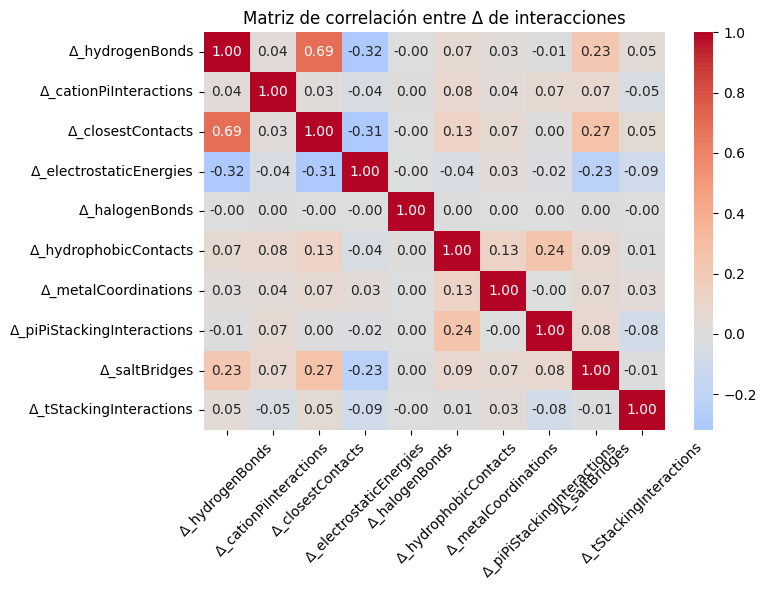

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 1) Merge para traer las interacciones de lig1 (referencia) SIN sufijos automáticos
pairs_ord = df_diff_conf.merge(
    df_3[["instancia"] + interaction_cols],
    left_on="lig1",
    right_on="instancia",
    how="left"
).drop(columns="instancia")

# Renombramos explícitamente para que sean col_1
pairs_ord.rename(
    columns={col: f"{col}_1" for col in interaction_cols},
    inplace=True
)

# 2) Merge para traer las interacciones de lig2 (objetivo) SIN sufijos automáticos
pairs_ord = pairs_ord.merge(
    df_3[["instancia"] + interaction_cols],
    left_on="lig2",
    right_on="instancia",
    how="left"
).drop(columns="instancia")

# Renombramos explícitamente para que sean col_2
pairs_ord.rename(
    columns={col: f"{col}_2" for col in interaction_cols},
    inplace=True
)

# 3) comprobaciones rápidas
assert set(pairs_ord["lig1"].unique()) <= set(df_3["instancia"]), \
    "Error: hay lig1 fuera de df_3"
assert set(pairs_ord["lig2"].unique()) <= set(df_3["instancia"]), \
    "Error: hay lig2 fuera de df_3"

# 4) Cálculo de los Δ restando siempre referencia (_1) de objetivo (_2)
for col in interaction_cols:
    pairs_ord[f"Δ_{col}"] = pairs_ord[f"{col}_2"] - pairs_ord[f"{col}_1"]

# 5) Correlación y heatmap
delta_cols = [c for c in pairs_ord.columns if c.startswith("Δ_")]
df_corr    = pairs_ord[delta_cols].dropna()
corr_mat   = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_mat,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)
plt.title("Matriz de correlación entre Δ de interacciones")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()




In [ ]:
#@title calcular el delta de las interacciones para cada par de ligandos

for col in interaction_cols:
    pairs[f"Δ_{col}"] = (pairs[f"{col}"] - pairs[f"{col}_2"]).abs()

In [ ]:
pairs.head()

,lig1,lig2,sim,Ligand_Class,hydrogenBonds,cationPiInteractions,closestContacts,electrostaticEnergies,halogenBonds,hydrophobicContacts,...,Δ_hydrogenBonds,Δ_cationPiInteractions,Δ_closestContacts,Δ_electrostaticEnergies,Δ_halogenBonds,Δ_hydrophobicContacts,Δ_metalCoordinations,Δ_piPiStackingInteractions,Δ_saltBridges,Δ_tStackingInteractions
0,4KSY_1SY_A_500,4LEZ_1SY_A_602,0.572659,"Nucleosides, nucleotides, and analogues",2,2,6,0.769609,0,14,...,0,2,5,0.007815,0,1,0,0,1,0
1,4KSY_1SY_A_500,4O67_1SY_A_601,0.591050,"Nucleosides, nucleotides, and analogues",2,2,6,0.769609,0,14,...,3,1,3,0.104402,0,14,0,0,0,0
2,4KSY_1SY_A_500,4O67_1SY_B_1101,0.595102,"Nucleosides, nucleotides, and analogues",2,2,6,0.769609,0,14,...,2,1,1,0.092002,0,8,0,0,0,0
3,4KSY_1SY_A_500,7FTG_1SY_B_1101,0.594381,"Nucleosides, nucleotides, and analogues",2,2,6,0.769609,0,14,...,1,1,0,0.061048,0,15,0,0,0,0
4,4KSY_1SY_A_500,8FLM_1SY_B_401,0.574865,"Nucleosides, nucleotides, and analogues",2,2,6,0.769609,0,14,...,3,2,0,0.031456,0,16,0,2,3,0


In [ ]:
#@title simplificar el análsis con el df tidy

delta_cols = [f"Δ_{c}" for c in interaction_cols]

tidy = (
    pairs[["Ligand_Class"] + delta_cols]
    .melt(id_vars="Ligand_Class", var_name="Interacción", value_name="Δ")
    .dropna(subset=["Δ"])
)


In [ ]:
#@title Visualizar la distribución de los deltas de las diferentes interacciones

import seaborn as sns
import matplotlib.pyplot as plt

for col in [c for c in pairs.columns if c.startswith("Δ_")]:
    plt.figure()
    sns.histplot(pairs[col], bins=10, kde=True)
    plt.title(f"Distribución de {col}")
    plt.xlabel("Δ (diferencia entre conformaciones)")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()
    plt.close()

<Axes: >

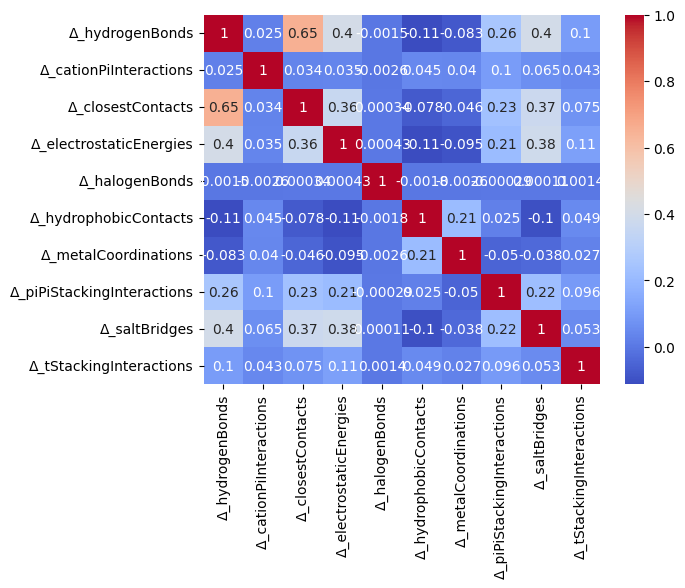

In [ ]:
#@title Correlación entre las interacciones

df_corr = pairs[[col for col in pairs.columns if col.startswith("Δ_")]].corr()
sns.heatmap(df_corr, annot=True, cmap="coolwarm")

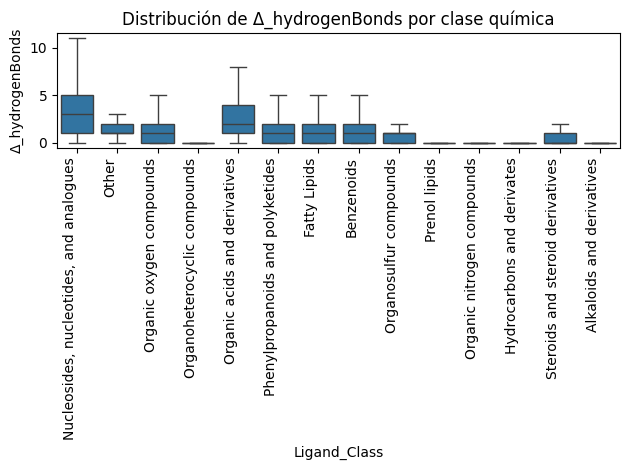

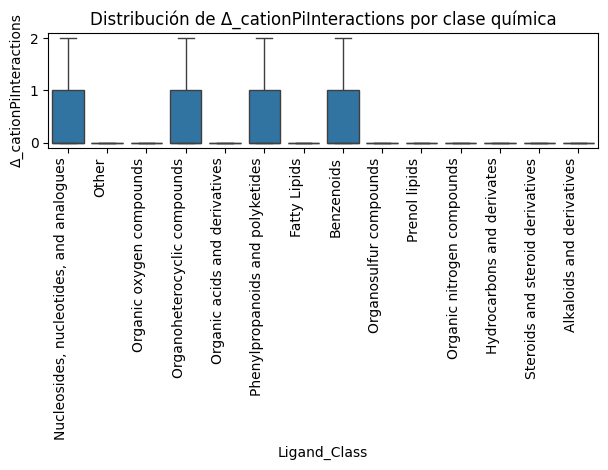

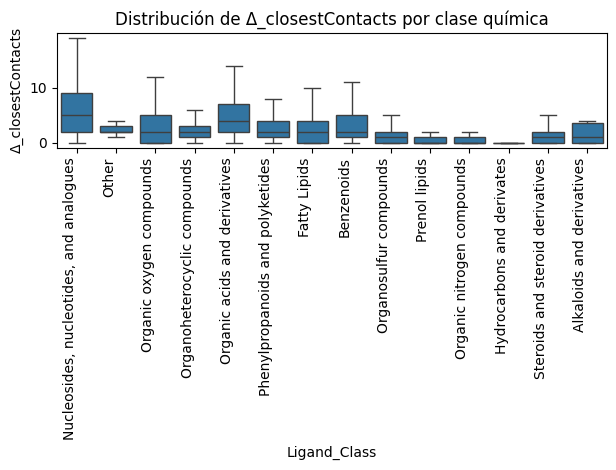

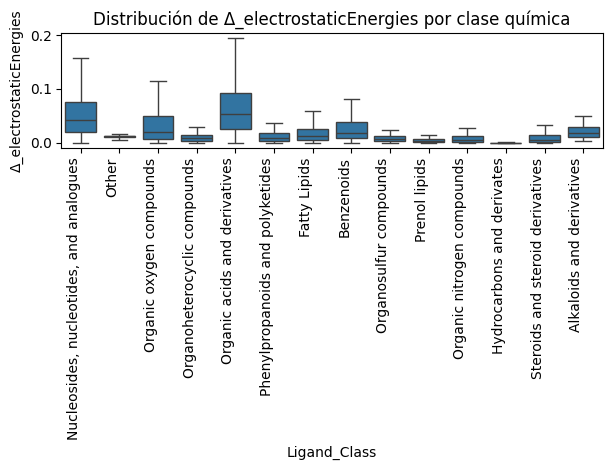

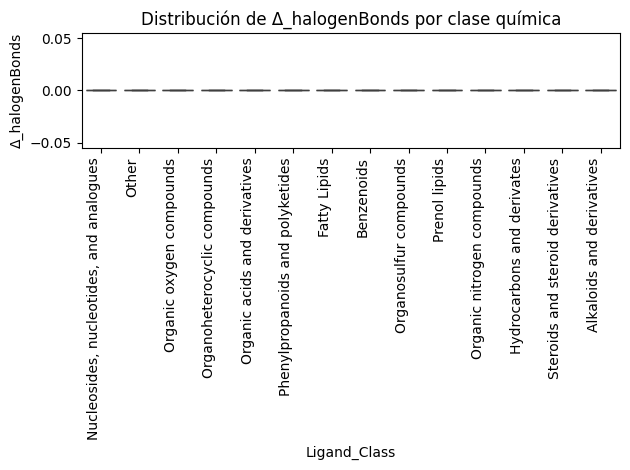

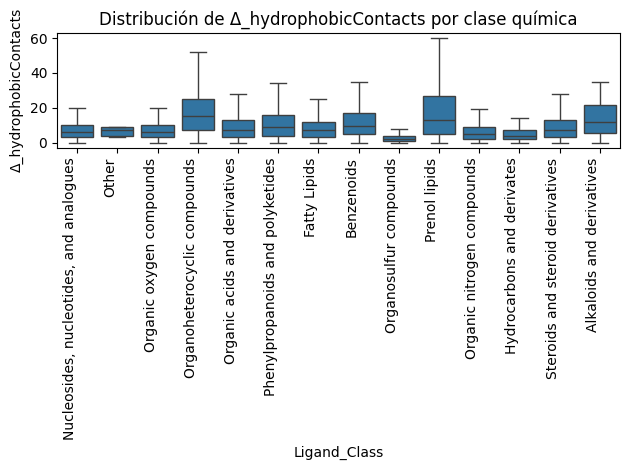

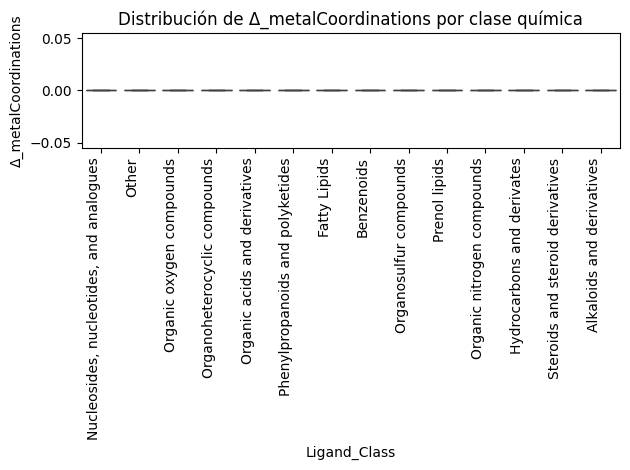

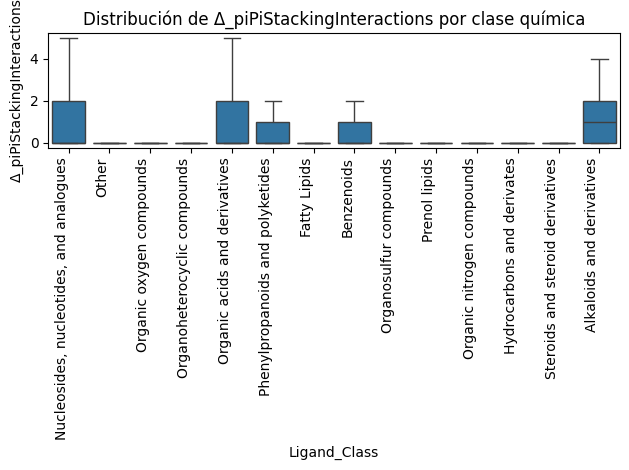

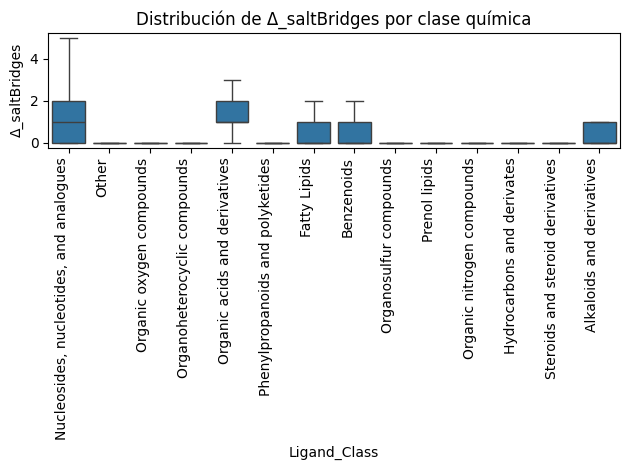

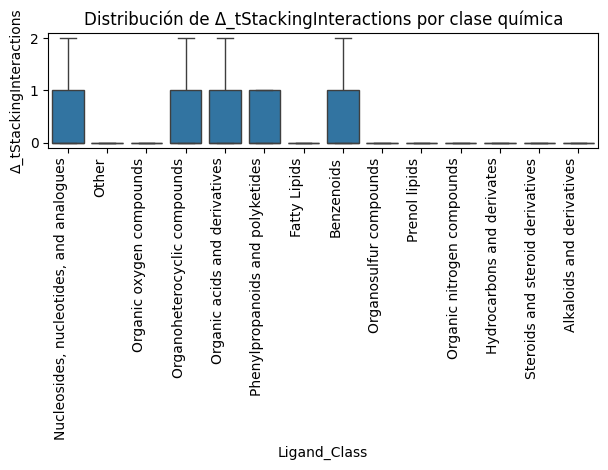

In [ ]:
#@title boxplot de delta en base a las clases químicas

import seaborn as sns
import matplotlib.pyplot as plt

for inter in delta_cols:
    plt.figure()
    sns.boxplot(
        data=pairs,
        x="Ligand_Class",
        y=inter,
        showfliers=False
    )
    plt.xticks(rotation=90, ha="right")
    plt.title(f"Distribución de {inter} por clase química")
    plt.tight_layout()
    plt.show()
    plt.close()

In [ ]:
medians = pairs.groupby("Ligand_Class")[delta_cols].median()
# Por Δ_hydrogenBonds, por ejemplo:
medians["Δ_hydrogenBonds"].sort_values(ascending=False)


,Δ_hydrogenBonds
Ligand_Class,
"Nucleosides, nucleotides, and analogues",3.0
Organic acids and derivatives,2.0
Fatty Lipids,1.0
Benzenoids,1.0
Organosulfur compounds,1.0
Organic oxygen compounds,1.0
Phenylpropanoids and polyketides,1.0
Other,1.0
Hydrocarbons and derivates,0.0


In [ ]:
q1 = pairs.groupby("Ligand_Class")[delta_cols].quantile(0.25)
q3 = pairs.groupby("Ligand_Class")[delta_cols].quantile(0.75)
iqr = q3 - q1
iqr["Δ_hydrophobicContacts"].sort_values(ascending=False)


,Δ_hydrophobicContacts
Ligand_Class,
Prenol lipids,22.0
Organoheterocyclic compounds,18.0
Alkaloids and derivatives,16.0
Phenylpropanoids and polyketides,12.0
Benzenoids,12.0
Organic acids and derivatives,10.0
Steroids and steroid derivatives,10.0
Fatty Lipids,9.0
Organic nitrogen compounds,7.0


In [ ]:
max_delta = pairs.groupby("Ligand_Class")[delta_cols].max()
max_delta["Δ_closestContacts"].sort_values(ascending=False)


,Δ_closestContacts
Ligand_Class,
"Nucleosides, nucleotides, and analogues",53
Fatty Lipids,50
Organic oxygen compounds,46
Organic acids and derivatives,36
Benzenoids,35
Prenol lipids,30
Organoheterocyclic compounds,27
Phenylpropanoids and polyketides,17
Organic nitrogen compounds,16


In [ ]:
import pandas as pd

# 1) Calcula la media de cada Δ por clase
delta_means = pairs.groupby("Ligand_Class")[delta_cols].mean()

# 2) Para tener un único valor de variabilidad global, calculamos la media sobre columnas
delta_means["mean_delta_all"] = delta_means.mean(axis=1)

# 3) Ordenamos por esa media global
delta_means_sorted = delta_means.sort_values("mean_delta_all")

# 4) Extraemos las 5 clases más rígidas y las 5 más flexibles
most_stable   = delta_means_sorted.head(5)["mean_delta_all"]
most_variable = delta_means_sorted.tail(5)["mean_delta_all"]

# 5) Construimos un DataFrame resumen
summary = pd.DataFrame({
    "Most Stable (low variability)": most_stable,
    "Most Variable (high variability)": most_variable
})

# 6) Mostrar toda la tabla ordenada
full_table = delta_means_sorted[["mean_delta_all"]].rename(
    columns={"mean_delta_all": "Mean Δ across interactions"}
)

# Mostrar por pantalla
print("🔹 Top 5 clases más rígidas:\n", most_stable, "\n")
print("🔹 Top 5 clases más flexibles:\n", most_variable, "\n")
print("🔹 Tabla completa de variabilidad global:\n", full_table)


🔹 Top 5 clases más rígidas:
 Ligand_Class
Organosulfur compounds              0.441345
Hydrocarbons and derivates          0.528976
Organic nitrogen compounds          0.819441
Other                               1.112373
Steroids and steroid derivatives    1.122007
Name: mean_delta_all, dtype: float64 

🔹 Top 5 clases más flexibles:
 Ligand_Class
Nucleosides, nucleotides, and analogues    1.951840
Benzenoids                                 1.959692
Organic acids and derivatives              1.970382
Alkaloids and derivatives                  1.971560
Organoheterocyclic compounds               2.088959
Name: mean_delta_all, dtype: float64 

🔹 Tabla completa de variabilidad global:
                                          Mean Δ across interactions
Ligand_Class                                                       
Organosulfur compounds                                     0.441345
Hydrocarbons and derivates                                 0.528976
Organic nitrogen compounds           

In [ ]:
#@title delta_means: DataFrame con media de cada Δ por clase

delta_means["mean_delta_all"] = delta_means.mean(axis=1)


In [ ]:
#@title Para cada clase, std sobre todas las interacciones

delta_stds = pairs.groupby("Ligand_Class")[delta_cols].std()

# Indicador global de dispersión:

delta_stds["std_delta_all"] = delta_stds.mean(axis=1)


In [ ]:
q1 = pairs.groupby("Ligand_Class")[delta_cols].quantile(0.25)
q3 = pairs.groupby("Ligand_Class")[delta_cols].quantile(0.75)
iqr = (q3 - q1).mean(axis=1)


In [ ]:
summary = pd.DataFrame({
    "mean_Δ": delta_means.mean_delta_all,
    "std_Δ": delta_stds.std_delta_all,
    "median_Δ": pairs.groupby("Ligand_Class")[delta_cols].median().mean(axis=1),
    "IQR_Δ": iqr
})


In [ ]:
summary

,mean_Δ,std_Δ,median_Δ,IQR_Δ
Ligand_Class,,,,
Alkaloids and derivatives,1.971560,1.756375,1.401788,2.251921
Benzenoids,1.959692,2.124207,1.251841,2.202956
Fatty Lipids,1.324149,1.387728,1.001157,1.602156
Hydrocarbons and derivates,0.528976,0.538367,0.400005,0.500008
"Nucleosides, nucleotides, and analogues",1.951840,1.756423,1.504236,2.405493
Organic acids and derivatives,1.970382,1.888089,1.405364,2.206782
Organic nitrogen compounds,0.819441,0.965287,0.500518,0.801032
Organic oxygen compounds,1.294757,1.488426,0.901887,1.404270
Organoheterocyclic compounds,2.088959,1.791729,1.700826,2.201036


In [ ]:
#@title Ordenar por variabilidad de la media

# Clases de menor a mayor variabilidad media
ordered_by_mean = summary.sort_values("mean_Δ")
print("Menos variables (mean_Δ más bajo):\n", ordered_by_mean.head(5))
print("\nMás variables (mean_Δ más alto):\n", ordered_by_mean.tail(5))

Menos variables (mean_Δ más bajo):
                                     mean_Δ     std_Δ  median_Δ     IQR_Δ
Ligand_Class                                                            
Organosulfur compounds            0.441345  0.411572  0.400670  0.600834
Hydrocarbons and derivates        0.528976  0.538367  0.400005  0.500008
Organic nitrogen compounds        0.819441  0.965287  0.500518  0.801032
Other                             1.112373  0.700911  1.001196  0.700306
Steroids and steroid derivatives  1.122007  1.090372  0.800480  1.301241

Más variables (mean_Δ más alto):
                                            mean_Δ     std_Δ  median_Δ  \
Ligand_Class                                                            
Nucleosides, nucleotides, and analogues  1.951840  1.756423  1.504236   
Benzenoids                               1.959692  2.124207  1.251841   
Organic acids and derivatives            1.970382  1.888089  1.405364   
Alkaloids and derivatives                1.971560  1.

In [ ]:
ordered_by_std = summary.sort_values("std_Δ")
print("Menos dispersas (std_Δ más bajo):\n", ordered_by_std.head(5))
print("\nMás dispersas (std_Δ más alto):\n", ordered_by_std.tail(5))


Menos dispersas (std_Δ más bajo):
                                     mean_Δ     std_Δ  median_Δ     IQR_Δ
Ligand_Class                                                            
Organosulfur compounds            0.441345  0.411572  0.400670  0.600834
Hydrocarbons and derivates        0.528976  0.538367  0.400005  0.500008
Other                             1.112373  0.700911  1.001196  0.700306
Organic nitrogen compounds        0.819441  0.965287  0.500518  0.801032
Steroids and steroid derivatives  1.122007  1.090372  0.800480  1.301241

Más dispersas (std_Δ más alto):
                                            mean_Δ     std_Δ  median_Δ  \
Ligand_Class                                                            
Nucleosides, nucleotides, and analogues  1.951840  1.756423  1.504236   
Organoheterocyclic compounds             2.088959  1.791729  1.700826   
Organic acids and derivatives            1.970382  1.888089  1.405364   
Prenol lipids                            1.909011  1.93

In [ ]:
ordered_by_median = summary.sort_values("median_Δ")
print("Median low:\n", ordered_by_median.head(5))
print("\nMedian high:\n", ordered_by_median.tail(5))

Median low:
                                     mean_Δ     std_Δ  median_Δ     IQR_Δ
Ligand_Class                                                            
Hydrocarbons and derivates        0.528976  0.538367  0.400005  0.500008
Organosulfur compounds            0.441345  0.411572  0.400670  0.600834
Organic nitrogen compounds        0.819441  0.965287  0.500518  0.801032
Steroids and steroid derivatives  1.122007  1.090372  0.800480  1.301241
Organic oxygen compounds          1.294757  1.488426  0.901887  1.404270

Median high:
                                            mean_Δ     std_Δ  median_Δ  \
Ligand_Class                                                            
Prenol lipids                            1.909011  1.938445  1.300250   
Alkaloids and derivatives                1.971560  1.756375  1.401788   
Organic acids and derivatives            1.970382  1.888089  1.405364   
Nucleosides, nucleotides, and analogues  1.951840  1.756423  1.504236   
Organoheterocyclic comp

In [ ]:
ordered_by_iqr = summary.sort_values("IQR_Δ")
print("IQR más estrecho:\n", ordered_by_iqr.head(5))
print("\nIQR más amplio:\n", ordered_by_iqr.tail(5))

IQR más estrecho:
                                     mean_Δ     std_Δ  median_Δ     IQR_Δ
Ligand_Class                                                            
Hydrocarbons and derivates        0.528976  0.538367  0.400005  0.500008
Organosulfur compounds            0.441345  0.411572  0.400670  0.600834
Other                             1.112373  0.700911  1.001196  0.700306
Organic nitrogen compounds        0.819441  0.965287  0.500518  0.801032
Steroids and steroid derivatives  1.122007  1.090372  0.800480  1.301241

IQR más amplio:
                                            mean_Δ     std_Δ  median_Δ  \
Ligand_Class                                                            
Benzenoids                               1.959692  2.124207  1.251841   
Organic acids and derivatives            1.970382  1.888089  1.405364   
Alkaloids and derivatives                1.971560  1.756375  1.401788   
Prenol lipids                            1.909011  1.938445  1.300250   
Nucleosides, n

In [ ]:
# Calcula media, mediana y desviación estándar del Δ para cada clase
stats = (
    tidy
    .groupby("Ligand_Class")["Δ"]
    .agg(
        mean_Δ = "mean",
        median_Δ = "median",
        std_Δ = "std",
        count = "count"
    )
    .sort_values("mean_Δ")
)

# Muestra las 5 clases con MENOR variabilidad media
print("Clases con MENOR variabilidad (media más baja):")
print(stats.head(5))

# Muestra las 5 clases con MAYOR variabilidad media
print("\nClases con MAYOR variabilidad (media más alta):")
print(stats.tail(5))


Clases con MENOR variabilidad (media más baja):
                                    mean_Δ  median_Δ     std_Δ    count
Ligand_Class                                                           
Organosulfur compounds            0.441345       0.0  1.071318    21560
Hydrocarbons and derivates        0.528976       0.0  2.235988   246840
Organic nitrogen compounds        0.819441       0.0  2.676610  3400530
Other                             1.112373       0.0  2.347933       90
Steroids and steroid derivatives  1.122007       0.0  3.765718  2751710

Clases con MAYOR variabilidad (media más alta):
                                           mean_Δ  median_Δ     std_Δ  \
Ligand_Class                                                            
Nucleosides, nucleotides, and analogues  1.951840  0.043804  3.684616   
Benzenoids                               1.959692  0.000000  5.274375   
Organic acids and derivatives            1.970382  0.035020  4.011266   
Alkaloids and derivatives         

In [ ]:
pairs.head()

,lig1,lig2,sim,Ligand_Class,hydrogenBonds,cationPiInteractions,closestContacts,electrostaticEnergies,halogenBonds,hydrophobicContacts,...,Δ_hydrogenBonds,Δ_cationPiInteractions,Δ_closestContacts,Δ_electrostaticEnergies,Δ_halogenBonds,Δ_hydrophobicContacts,Δ_metalCoordinations,Δ_piPiStackingInteractions,Δ_saltBridges,Δ_tStackingInteractions
0,4KSY_1SY_A_500,4LEZ_1SY_A_602,0.572659,"Nucleosides, nucleotides, and analogues",2,2,6,0.769609,0,14,...,0,2,5,0.007815,0,1,0,0,1,0
1,4KSY_1SY_A_500,4O67_1SY_A_601,0.591050,"Nucleosides, nucleotides, and analogues",2,2,6,0.769609,0,14,...,3,1,3,0.104402,0,14,0,0,0,0
2,4KSY_1SY_A_500,4O67_1SY_B_1101,0.595102,"Nucleosides, nucleotides, and analogues",2,2,6,0.769609,0,14,...,2,1,1,0.092002,0,8,0,0,0,0
3,4KSY_1SY_A_500,7FTG_1SY_B_1101,0.594381,"Nucleosides, nucleotides, and analogues",2,2,6,0.769609,0,14,...,1,1,0,0.061048,0,15,0,0,0,0
4,4KSY_1SY_A_500,8FLM_1SY_B_401,0.574865,"Nucleosides, nucleotides, and analogues",2,2,6,0.769609,0,14,...,3,2,0,0.031456,0,16,0,2,3,0


In [ ]:
from scipy.stats import kruskal

for col in interaction_cols:
    groups = [group[col].dropna() for name, group in pairs.groupby("Ligand_Class")]
    stat, p = kruskal(*groups)
    print(f"{col}: Kruskal-Wallis p-value = {p:.4g}")

hydrogenBonds: Kruskal-Wallis p-value = 0
cationPiInteractions: Kruskal-Wallis p-value = 0
closestContacts: Kruskal-Wallis p-value = 0
electrostaticEnergies: Kruskal-Wallis p-value = 0
halogenBonds: Kruskal-Wallis p-value = 0
hydrophobicContacts: Kruskal-Wallis p-value = 0
metalCoordinations: Kruskal-Wallis p-value = 0
piPiStackingInteractions: Kruskal-Wallis p-value = 0
saltBridges: Kruskal-Wallis p-value = 0
tStackingInteractions: Kruskal-Wallis p-value = 0


In [ ]:
!pip install scikit_posthocs

In [ ]:
pairs.columns = pairs.columns.astype(str)


In [ ]:
interaction_cols = [c for c in pairs.columns if c.startswith("Δ_")]
print("Interaction cols definitivas:", interaction_cols)


Interaction cols definitivas: ['Δ_hydrogenBonds', 'Δ_cationPiInteractions', 'Δ_closestContacts', 'Δ_electrostaticEnergies', 'Δ_halogenBonds', 'Δ_hydrophobicContacts', 'Δ_metalCoordinations', 'Δ_piPiStackingInteractions', 'Δ_saltBridges', 'Δ_tStackingInteractions']


In [ ]:
from scipy.stats import kruskal

for col in interaction_cols:
    try:
        # Agrupa por clase y extrae sólo los valores no-nulos
        groups = [
            grp[col].dropna()
            for _, grp in pairs.groupby("Ligand_Class")
            if col in grp.columns and not grp[col].dropna().empty
        ]
        if len(groups) < 2:
            print(f"{col}: “No hay suficientes clases con datos.”")
            continue

        stat, p = kruskal(*groups)
        print(f"{col}: p-value = {p:.4g}")
    except KeyError as e:
        print(f"¡Error KeyError en columna `{col}`! Detalle: {e}")


Δ_hydrogenBonds: p-value = 0
Δ_cationPiInteractions: p-value = 0
Δ_closestContacts: p-value = 0
Δ_electrostaticEnergies: p-value = 0
Δ_halogenBonds: p-value = 0
Δ_hydrophobicContacts: p-value = 0
Δ_metalCoordinations: p-value = 0
Δ_piPiStackingInteractions: p-value = 0
Δ_saltBridges: p-value = 0
Δ_tStackingInteractions: p-value = 0


In [ ]:
print("Clases nulas:", pairs["Ligand_Class"].isnull().sum())


Clases nulas: 7167


In [ ]:
pairs_1 = pairs.dropna(subset=["Ligand_Class"])

In [ ]:
# Convierte todo a string y muestra la lista completa
pairs_1.columns = pairs_1.columns.astype(str)
print(repr(pairs_1.columns.tolist()))


['lig1', 'lig2', 'sim', 'Ligand_Class', 'hydrogenBonds', 'cationPiInteractions', 'closestContacts', 'electrostaticEnergies', 'halogenBonds', 'hydrophobicContacts', 'metalCoordinations', 'piPiStackingInteractions', 'saltBridges', 'tStackingInteractions', 'hydrogenBonds_2', 'cationPiInteractions_2', 'closestContacts_2', 'electrostaticEnergies_2', 'halogenBonds_2', 'hydrophobicContacts_2', 'metalCoordinations_2', 'piPiStackingInteractions_2', 'saltBridges_2', 'tStackingInteractions_2', 'Δ_hydrogenBonds', 'Δ_cationPiInteractions', 'Δ_closestContacts', 'Δ_electrostaticEnergies', 'Δ_halogenBonds', 'Δ_hydrophobicContacts', 'Δ_metalCoordinations', 'Δ_piPiStackingInteractions', 'Δ_saltBridges', 'Δ_tStackingInteractions']


In [ ]:
from scipy.stats import kruskal

failed = []
for col in interaction_cols:
    try:
        groups = [
            grp[col].dropna()
            for _, grp in pairs_1.groupby("Ligand_Class")
            if col in grp.columns and not grp[col].dropna().empty
        ]
        if len(groups) < 2:
            print(f"{col}: No hay suficientes clases con datos.")
            continue
        stat, p = kruskal(*groups)
        print(f"{col}: p = {p:.4g}")
    except KeyError as e:
        failed.append((col, str(e)))

if failed:
    print("\n¡Se han producido errores en estas columnas!")
    print(failed)
else:
    print("\n— Ningún KeyError: las columnas están limpias —")


Δ_hydrogenBonds: p = 0
Δ_cationPiInteractions: p = 0
Δ_closestContacts: p = 0
Δ_electrostaticEnergies: p = 0
Δ_halogenBonds: p = 0
Δ_hydrophobicContacts: p = 0
Δ_metalCoordinations: p = 0
Δ_piPiStackingInteractions: p = 0
Δ_saltBridges: p = 0
Δ_tStackingInteractions: p = 0

— Ningún KeyError: las columnas están limpias —


In [ ]:
import pandas as pd
from scipy.stats import kruskal

results = []
for col in interaction_cols:
    groups = [
        grp[col].dropna()
        for _, grp in pairs_1.groupby("Ligand_Class")
        if col in grp.columns and not grp[col].dropna().empty
    ]
    if len(groups) < 2:
        continue
    stat, p = kruskal(*groups)
    results.append({"interacción": col, "p_value": p})

df_p = pd.DataFrame(results).set_index("interacción")
df_p["significativo"] = df_p["p_value"] < 0.05

print(df_p)


                            p_value  significativo
interacción                                       
Δ_hydrogenBonds                 0.0           True
Δ_cationPiInteractions          0.0           True
Δ_closestContacts               0.0           True
Δ_electrostaticEnergies         0.0           True
Δ_halogenBonds                  0.0           True
Δ_hydrophobicContacts           0.0           True
Δ_metalCoordinations            0.0           True
Δ_piPiStackingInteractions      0.0           True
Δ_saltBridges                   0.0           True
Δ_tStackingInteractions         0.0           True


In [ ]:

import scikit_posthocs as sp
import pandas as pd

for col in interaction_cols:
    # Prepara un DataFrame reduciendo solo a clase + valores no nulos
    data = pairs_1[["Ligand_Class", col]].dropna()

    # Aplica Dunn con corrección Holm
    dunn_holm = sp.posthoc_dunn(
        data,
        val_col=col,
        group_col="Ligand_Class",
        p_adjust="holm"
    )

    sig = dunn_holm.where(dunn_holm < 0.05).stack().reset_index()
    sig.columns = ["Clase 1", "Clase 2", "p-value"]

    print(f"\n── Post-hoc Dunn (Holm) para {col} ──")
    if sig.empty:
        print("  Ninguna diferencia par a par significativa (p ≥ 0.05).")
    else:
        print(sig.sort_values("p-value").to_string(index=False))



── Post-hoc Dunn (Holm) para Δ_hydrogenBonds ──
                                  Clase 1                                   Clase 2       p-value
                               Benzenoids                Organic nitrogen compounds  0.000000e+00
                               Benzenoids                              Hydrocarbons  0.000000e+00
                              Fatty Acyls                Organic nitrogen compounds  0.000000e+00
                              Fatty Acyls              Organoheterocyclic compounds  0.000000e+00
                              Fatty Acyls                             Prenol lipids  0.000000e+00
                              Fatty Acyls                             Glycerolipids  0.000000e+00
                              Fatty Acyls                              Hydrocarbons  0.000000e+00
                              Fatty Acyls                      Glycerophospholipids  0.000000e+00
                              Fatty Acyls   Nucleosides, nucleotides,

In [ ]:
# Seleccionar las columnas de interacción
interaction_cols = [col for col in pairs.columns if col.startswith("Δ_")]

# Calcular la media de cada delta por clase química
delta_means_by_class = pairs.groupby("Ligand_Class")[interaction_cols].mean().sort_values(by="Δ_hydrogenBonds", ascending=False)

In [ ]:
for col in interaction_cols:
    sorted_classes = pairs.groupby("Ligand_Class")[col].mean().sort_values()
    most_stable = sorted_classes.head(3)
    most_variable = sorted_classes.tail(3)

    print(f"\n🔹 {col} 🔹")
    print("Más estables (menor delta):")
    print(most_stable)
    print("Más variables (mayor delta):")
    print(most_variable)


🔹 Δ_hydrogenBonds 🔹
Más estables (menor delta):
Ligand_Class
Hydrocarbons and derivates    0.000000
Organic nitrogen compounds    0.085681
Alkaloids and derivatives     0.260870
Name: Δ_hydrogenBonds, dtype: float64
Más variables (mayor delta):
Ligand_Class
Benzenoids                                 1.715010
Organic acids and derivatives              2.738177
Nucleosides, nucleotides, and analogues    3.197585
Name: Δ_hydrogenBonds, dtype: float64

🔹 Δ_cationPiInteractions 🔹
Más estables (menor delta):
Ligand_Class
Hydrocarbons and derivates    0.0
Organosulfur compounds        0.0
Other                         0.0
Name: Δ_cationPiInteractions, dtype: float64
Más variables (mayor delta):
Ligand_Class
Organoheterocyclic compounds    0.474639
Alkaloids and derivatives       0.521739
Organic nitrogen compounds      0.552502
Name: Δ_cationPiInteractions, dtype: float64

🔹 Δ_closestContacts 🔹
Más estables (menor delta):
Ligand_Class
Hydrocarbons and derivates    0.084427
Organic nitrogen c

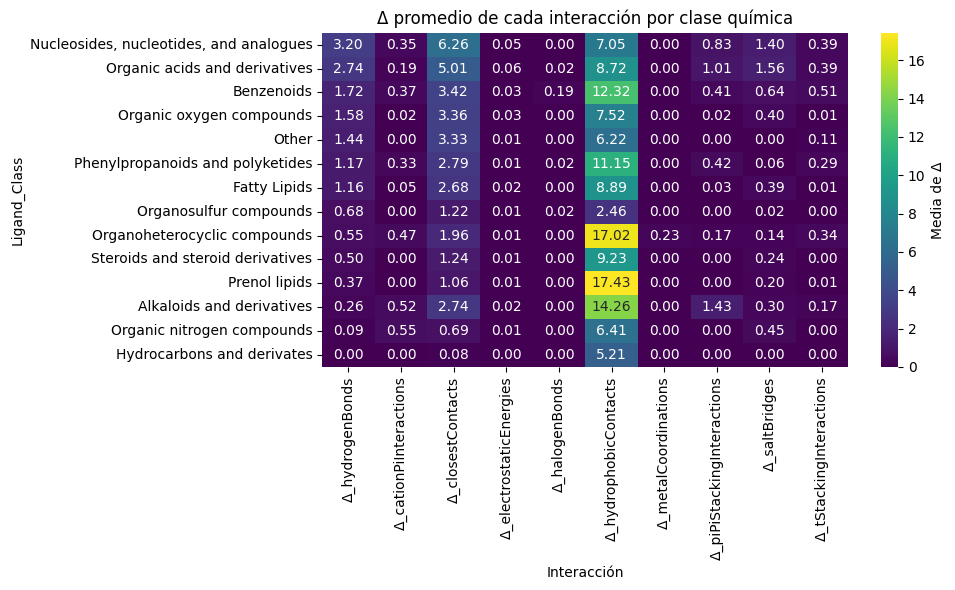

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(
    delta_means_by_class,
    annot=True, fmt=".2f",
    cmap="viridis",
    cbar_kws={"label": "Media de Δ"}
)
plt.title("Δ promedio de cada interacción por clase química")
plt.ylabel("Ligand_Class")
plt.xlabel("Interacción")
plt.tight_layout()
plt.show()

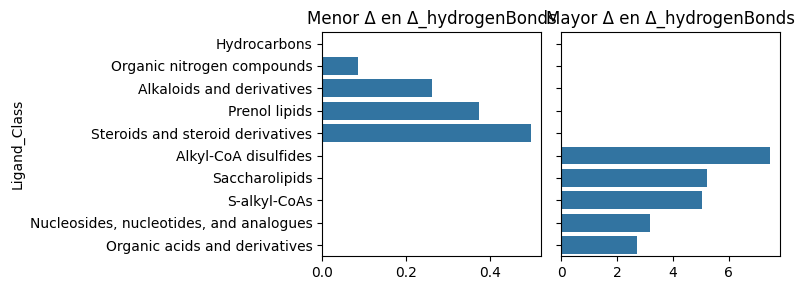

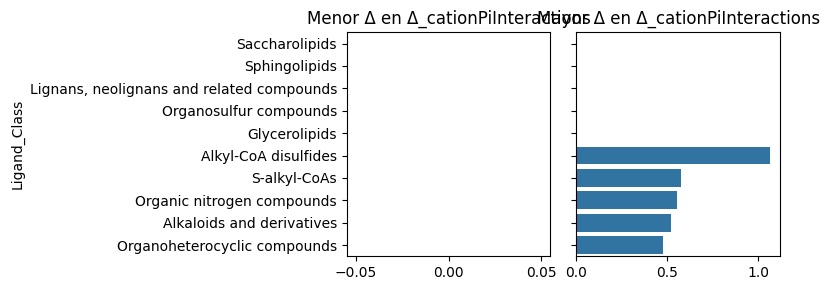

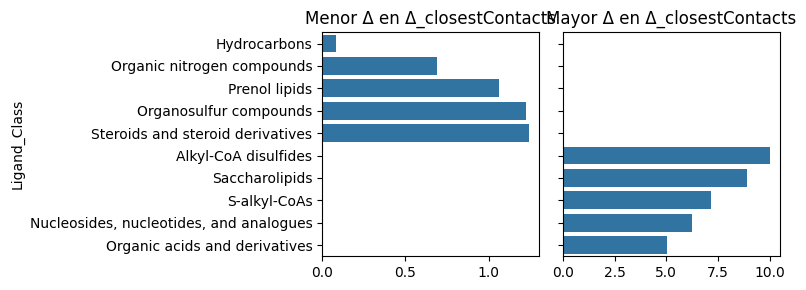

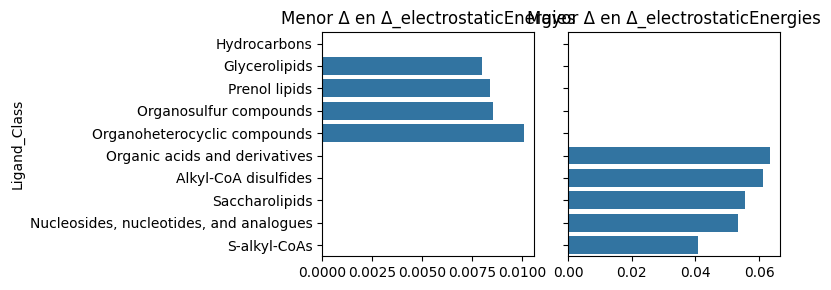

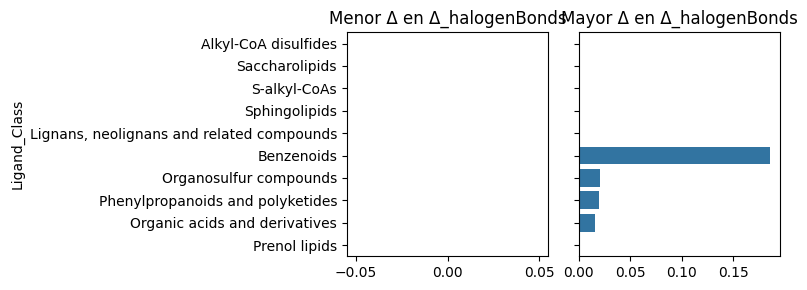

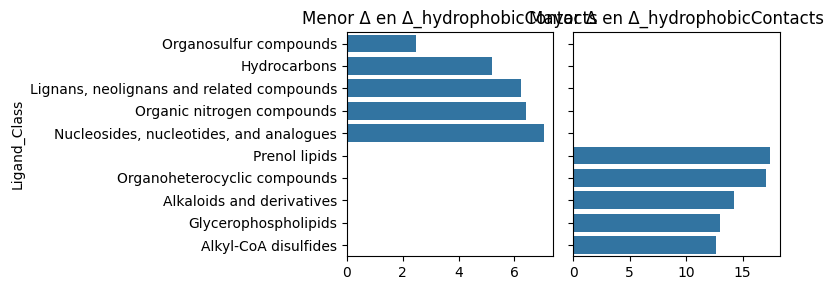

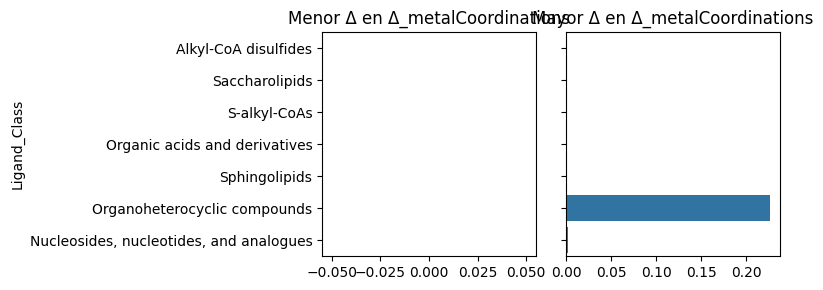

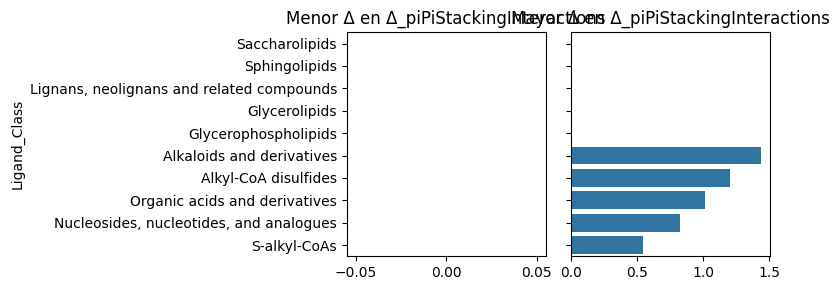

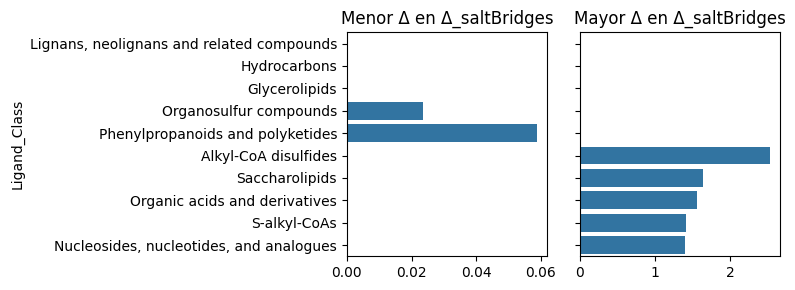

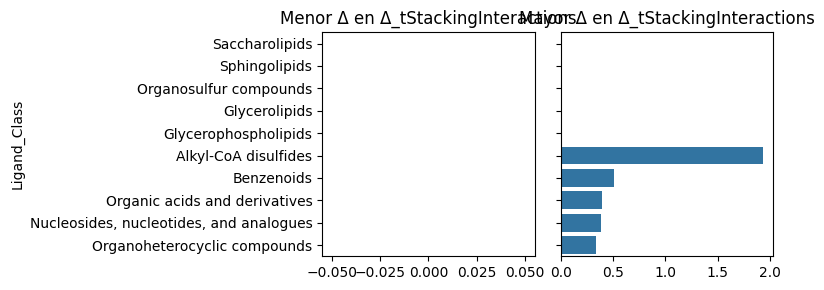

In [ ]:
for col in interaction_cols:
    top5 = delta_means_by_class[col].nlargest(5)
    bot5 = delta_means_by_class[col].nsmallest(5)
    fig, ax = plt.subplots(1,2, figsize=(8,3), sharey=True)
    sns.barplot(x=bot5.values, y=bot5.index, ax=ax[0])
    ax[0].set_title(f"Menor Δ en {col}")
    sns.barplot(x=top5.values, y=top5.index, ax=ax[1])
    ax[1].set_title(f"Mayor Δ en {col}")
    plt.tight_layout()
    plt.show()


In [ ]:
# Ejemplo para Δ_hydrogenBonds en la clase más variable
cls = most_variable.index[-1]
top_outliers = pairs[pairs["Ligand_Class"]==cls].nlargest(10, "Δ_hydrogenBonds")
print(top_outliers[["lig1","lig2","Δ_hydrogenBonds"]])


                   lig1            lig2  Δ_hydrogenBonds
4629170  5EGL_5NG_C_201  8VR6_5NG_A_201               18
4629177  7OVV_5NG_B_301  8VR6_5NG_A_201               17
4629181  8VR6_5NG_A_201  8XJH_5NG_B_301               13
4629174  7OVV_5NG_A_301  8VR6_5NG_A_201               12
4629180  8VR6_5NG_A_201  8XJH_5NG_A_302               10
4629171  5EGL_5NG_C_201  8XJH_5NG_A_302                8
4629178  7OVV_5NG_B_301  8XJH_5NG_A_302                7
4629168  5EGL_5NG_C_201  7OVV_5NG_A_301                6
4629172  5EGL_5NG_C_201  8XJH_5NG_B_301                5
4629173  7OVV_5NG_A_301  7OVV_5NG_B_301                5


Ligando 5NG

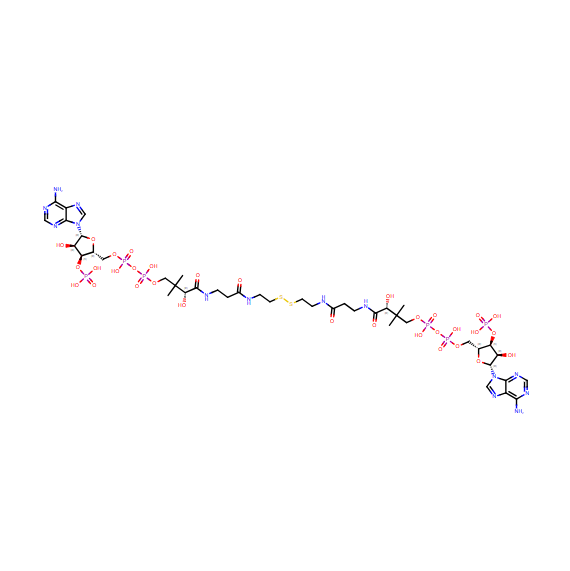



También puedo realizar el análisis con el violin plot

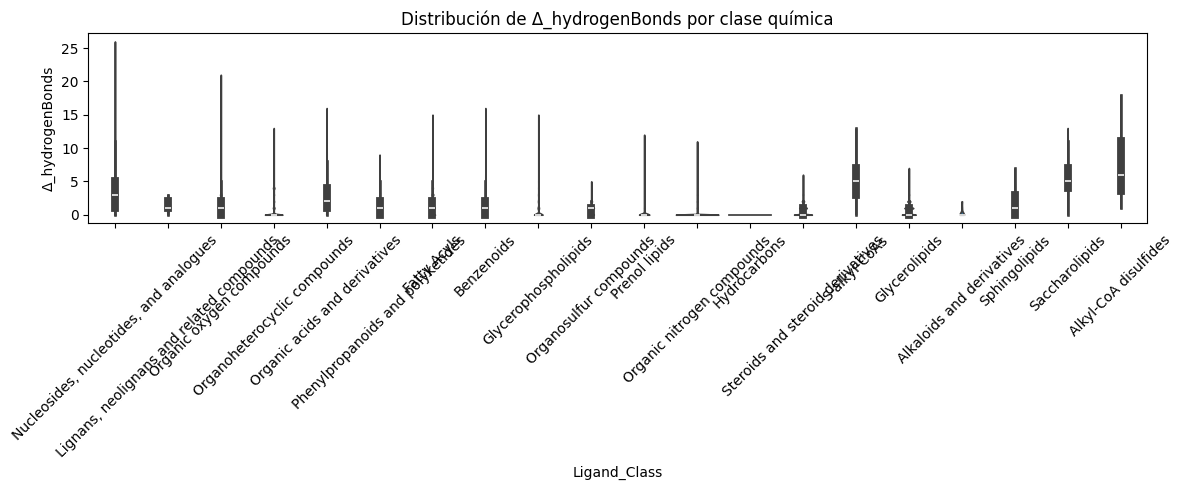

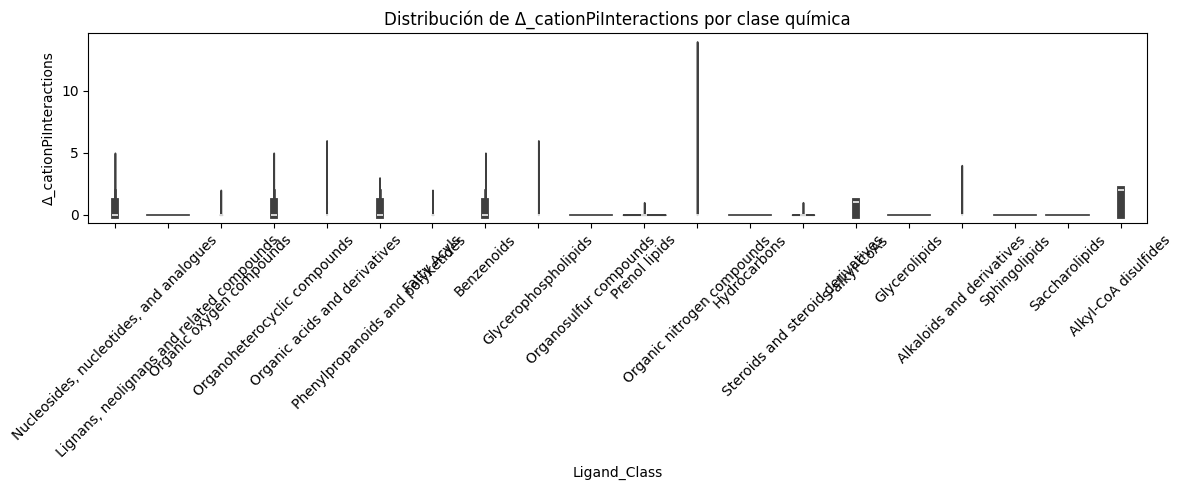

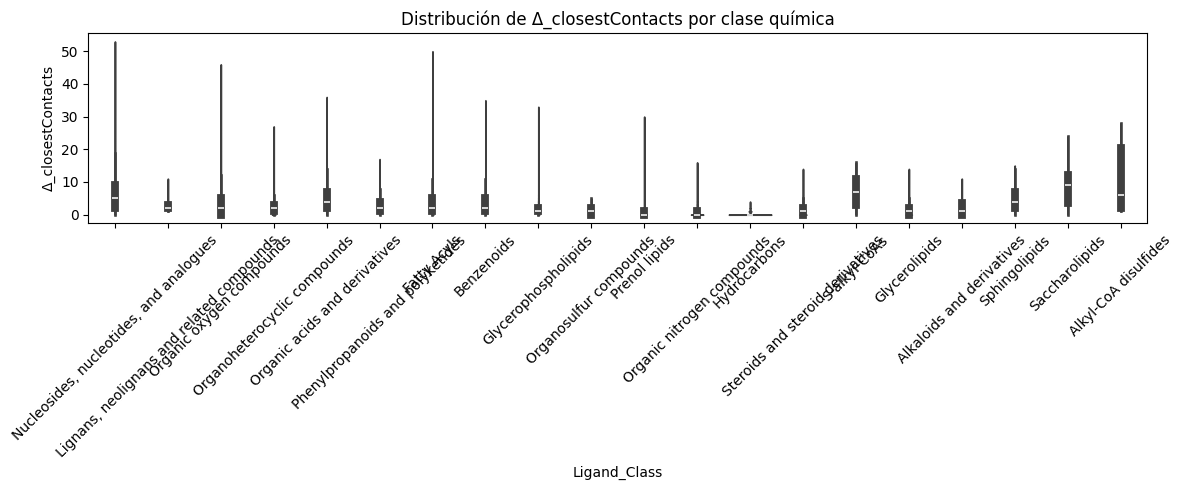

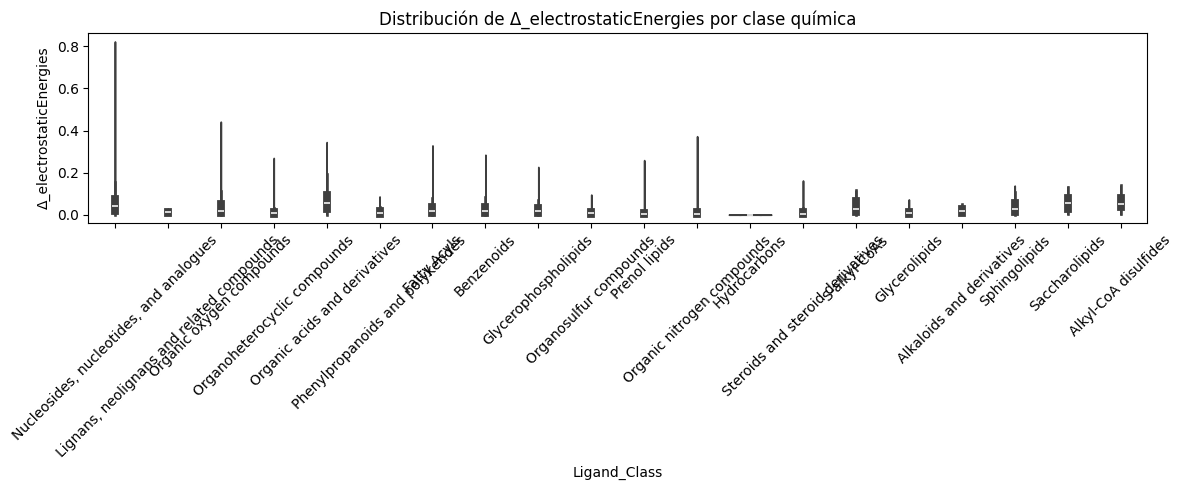

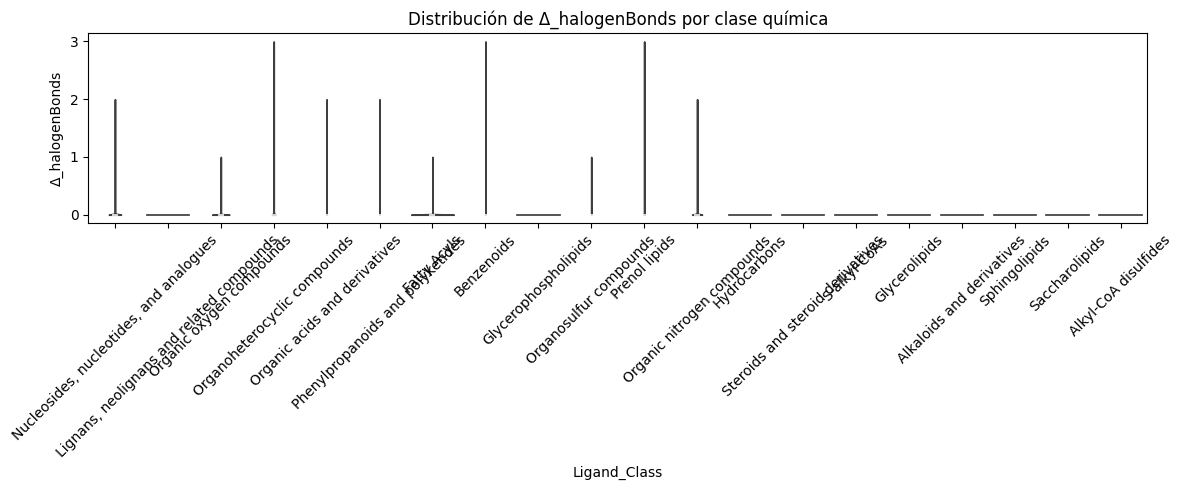

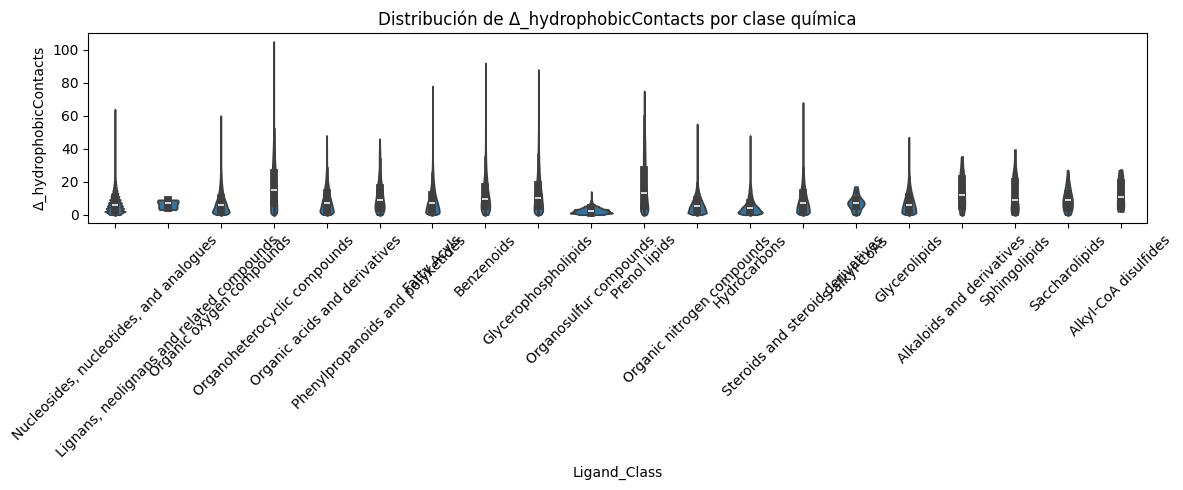

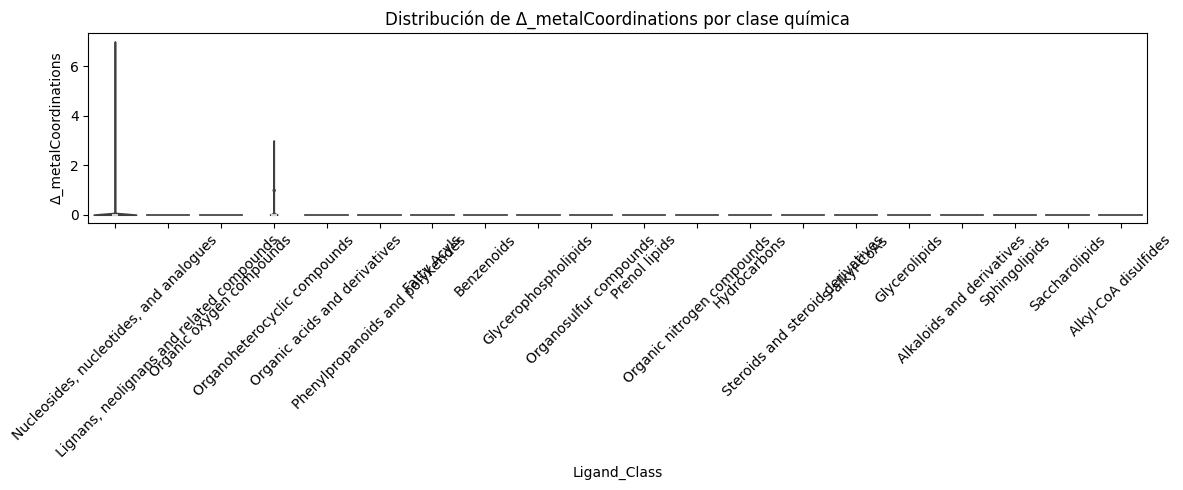

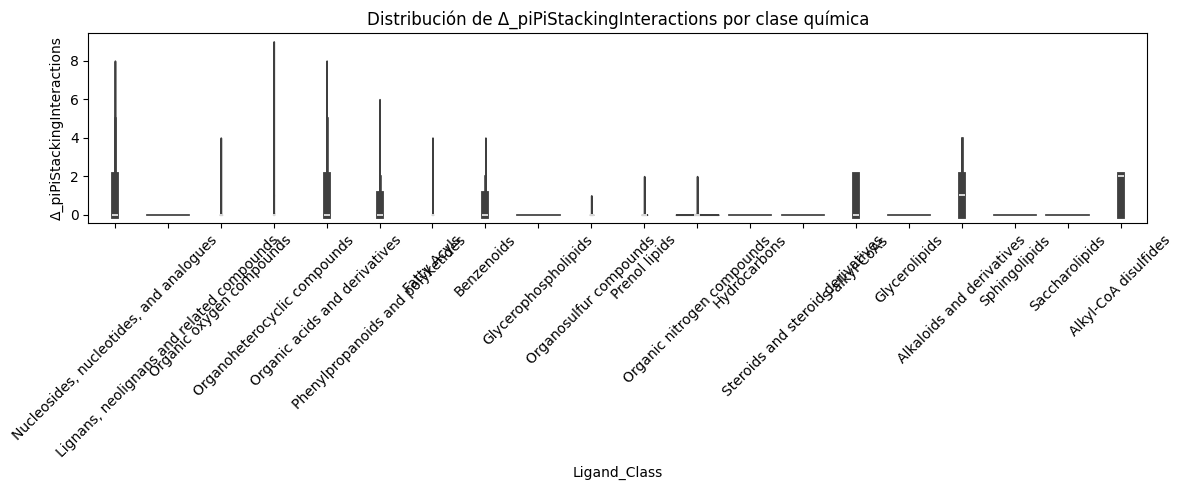

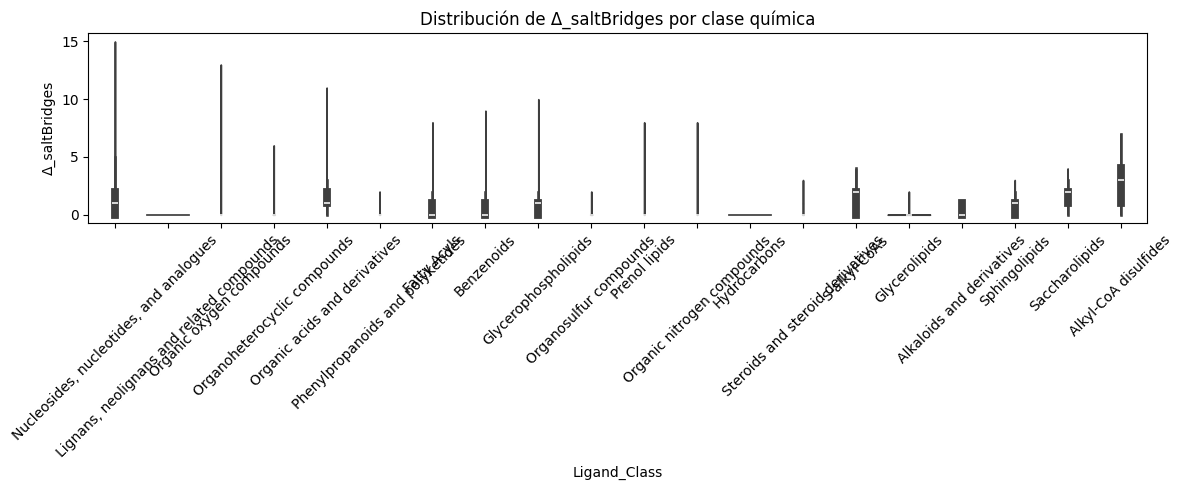

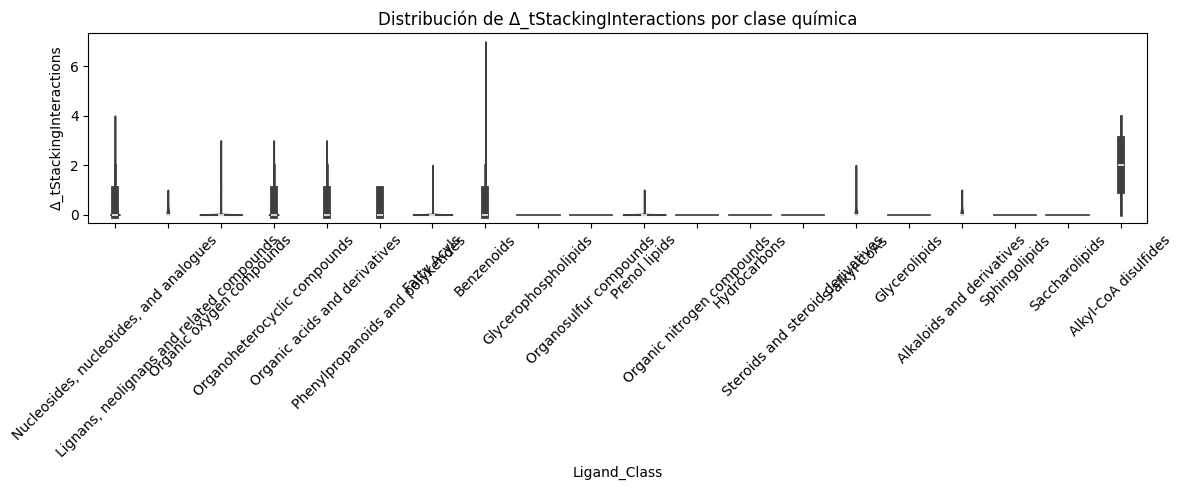

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

interaction_cols = [col for col in pairs.columns if col.startswith("Δ_")]

for col in interaction_cols:
    plt.figure(figsize=(12, 5))
    sns.violinplot(data=pairs, x="Ligand_Class", y=col, cut=0)
    plt.xticks(rotation=45)
    plt.title(f"Distribución de {col} por clase química")
    plt.tight_layout()
    plt.show()
    plt.close()

## Añadir parte de correlación positiva y negativa

In [ ]:
df_4 = df_3.copy()

In [ ]:
interaction_cols = [
    "hydrogenBonds",
    "cationPiInteractions",
    "closestContacts",
    "electrostaticEnergies",
    "halogenBonds",
    "hydrophobicContacts",
    "metalCoordinations",
    "piPiStackingInteractions",
    "saltBridges",
    "tStackingInteractions",
]

In [ ]:
df_4.columns

Index(['PDB_entry_id', 'Classification', 'Organism', 'Uniprot_id', 'Ligand_id',
       'Ligand_InChi', 'Experimental_method', 'Resolution', 'Affinity',
       'Coordenadas', 'Ligand_smiles', 'Mol_Weight', 'n_atoms', 'instancia',
       'Ligand_Class', 'Pfam_Names', 'SUPFAM_Names', 'intepro_class',
       'cationPiInteractions', 'closestContacts', 'electrostaticEnergies',
       'halogenBonds', 'hydrogenBonds', 'hydrophobicContacts',
       'metalCoordinations', 'piPiStackingInteractions', 'saltBridges',
       'tStackingInteractions'],
      dtype='object')

In [ ]:
#@title Crear el df pairs con los pares de ligandos y sus interacciones

# --- unir info de lig1 ---
pairs_2 = df_diff_conf.merge(
    df_4[["instancia", "Ligand_Class"] + interaction_cols],
    left_on="lig1",
    right_on="instancia",
    how="left",
    suffixes=("", "_1"),
).drop(columns="instancia")

# --- unir info de lig2 ---
pairs_2 = pairs_2.merge(
    df_4[["instancia"] + interaction_cols],
    left_on="lig2",
    right_on="instancia",
    how="left",
    suffixes=("", "_2"),
).drop(columns="instancia")

In [ ]:
pairs_2.columns

Index(['lig1', 'lig2', 'sim', 'Ligand_Class', 'hydrogenBonds',
       'cationPiInteractions', 'closestContacts', 'electrostaticEnergies',
       'halogenBonds', 'hydrophobicContacts', 'metalCoordinations',
       'piPiStackingInteractions', 'saltBridges', 'tStackingInteractions',
       'hydrogenBonds_2', 'cationPiInteractions_2', 'closestContacts_2',
       'electrostaticEnergies_2', 'halogenBonds_2', 'hydrophobicContacts_2',
       'metalCoordinations_2', 'piPiStackingInteractions_2', 'saltBridges_2',
       'tStackingInteractions_2'],
      dtype='object')

In [ ]:
# Calcular Δ conservando el signo (para ver correlación positiva/negativa)
for col in interaction_cols:
    pairs_2[f"Δ_{col}"] = pairs_2[f"{col}"] - pairs_2[f"{col}_2"]


In [ ]:
# Solo las columnas Δ_
delta_cols = [f"Δ_{col}" for col in interaction_cols]

# Correlación de cada interacción con sim
correlations = pairs_2[delta_cols].corrwith(pairs_2['sim'])

print(correlations.sort_values(ascending=False))  # ordenado de mayor a menor


Δ_cationPiInteractions        0.070728
Δ_metalCoordinations          0.006221
Δ_closestContacts             0.004579
Δ_electrostaticEnergies       0.003657
Δ_halogenBonds                0.002434
Δ_hydrophobicContacts        -0.003535
Δ_saltBridges                -0.009048
Δ_hydrogenBonds              -0.012902
Δ_piPiStackingInteractions   -0.013792
Δ_tStackingInteractions      -0.060113
dtype: float64


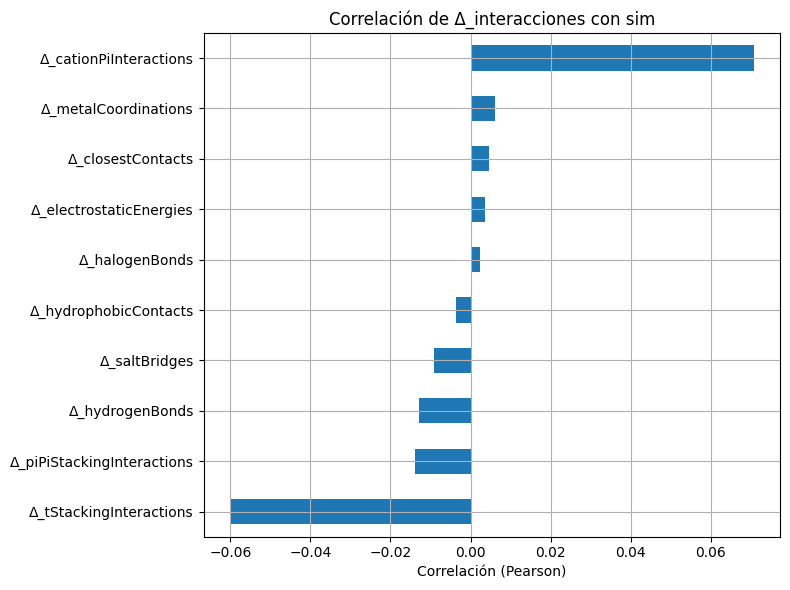

In [ ]:
import matplotlib.pyplot as plt

correlations.sort_values().plot(kind='barh', figsize=(8,6), title='Correlación de Δ_interacciones con sim')
plt.xlabel('Correlación (Pearson)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Lista de columnas Δ_
delta_cols = [col for col in pairs_2.columns if col.startswith("Δ_")]

# Agrupar por clase química y calcular promedio de cada interacción
correlations_class = pairs_2.groupby("Ligand_Class")[delta_cols].mean()


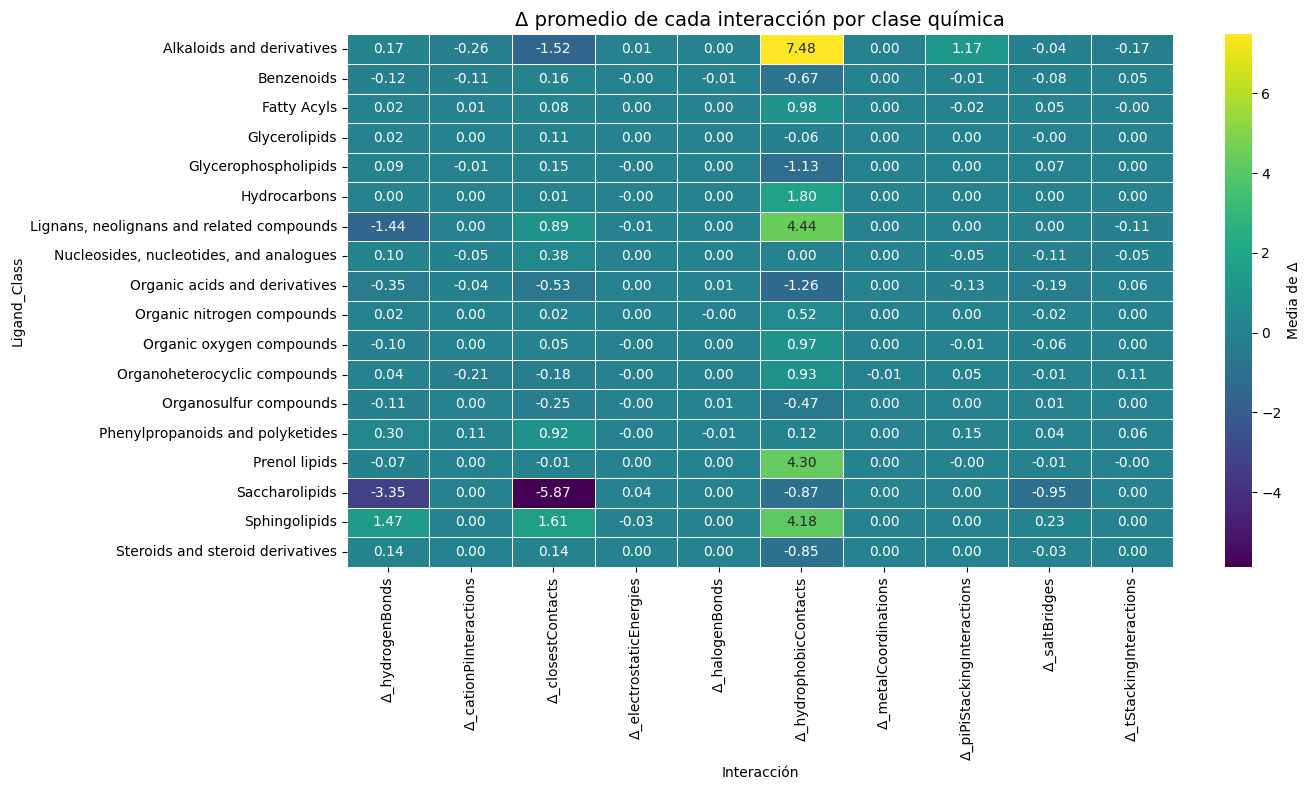

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.heatmap(
    correlations_class,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    linewidths=0.5,
    cbar_kws={"label": "Media de Δ"}
)

plt.title("Δ promedio de cada interacción por clase química", fontsize=14)
plt.ylabel("Ligand_Class")
plt.xlabel("Interacción")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


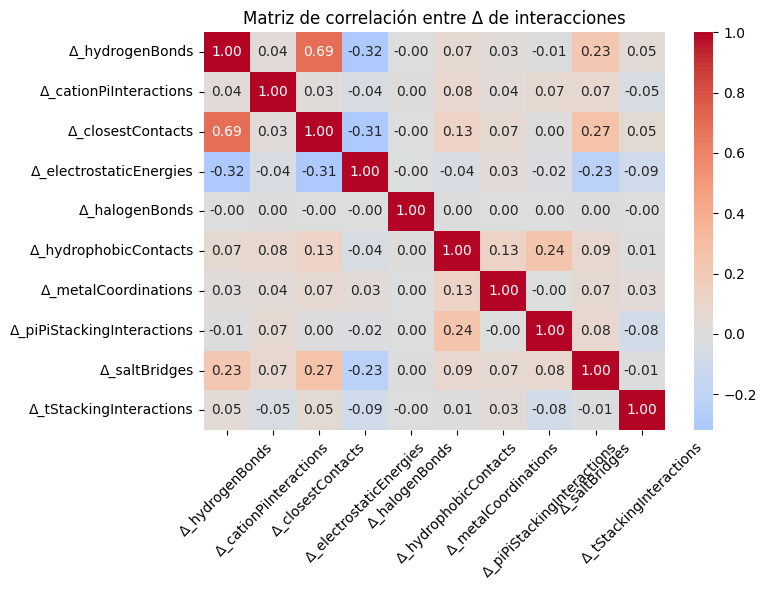

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


delta_cols = [col for col in pairs_2.columns if col.startswith("Δ_")]
df_corr = pairs_2[delta_cols].dropna()

# Calcula la correlación entre deltas (Pearson por defecto)
correlation_matrix = df_corr.corr()

# Genera el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)
plt.title("Matriz de correlación entre Δ de interacciones")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
